# Panel Production Contour Plot

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
inflections = {  # <Maximum Liters/Panel/Day, [(Solar Energy, kWr/m^2, Mean RH %), ...]>
    2: [
        (4.632791878172589, 15.497641880796898),
        (4.632791878172589, 15.497641880796898),  # Duplicate point for regression
        (5.0313705583756345, 11.671321671452887),
    ],
    2.5: [
        (4.632791878172589, 25.985086489364107),
        (4.685583756345178, 24.509856113489647),
        (5.554010152284264, 15.604207124594176),
        (6.052893401015229, 11.707593218813969),
    ],
    3: [
        (4.63015228426396, 39.13122614700569),
        (5.00233502538071, 30.79879882131531),
        (5.588324873096447, 22.76938418972926),
        (6.636243654822335, 14.313239958311158),
    ],
    3.5: [
        (4.63015228426396, 55.010103547301114),
        (4.785888324873096, 49.25492430774769),
        (5.311167512690355, 37.08746035435522),
        (5.601522842639594, 33.10958693549477),
        (5.878680203045685, 28.097271479879147),
        (6.308934010152284, 23.016536826398948),
        (6.638883248730965, 20.369463668468697),
    ],
    4: [
        (4.72253807106599, 68.89816973959468),
        (5.076243654822335, 55.98606122862136),
        (5.625279187817259, 43.15474360608539),
        (6.161116751269036, 33.57258808268789),
        (6.638883248730965, 28.050409015588343),
    ],
    4.5: [
        (5.2055837563451774, 68.8414661578028),
        (5.361319796954315, 62.64315545591556),
        (5.646395939086294, 56.08016105691729),
        (5.870761421319797, 49.441155740839335),
        (6.427715736040609, 38.973487092202845),
        (6.638883248730965, 36.54376204365334),
    ],
    5: [
        (5.680710659898478, 68.9321918886698),
        (6.0977664974619294, 56.09618801970475),
        (6.636243654822335, 45.62786329656818),
    ],
    5.5: [
        (6.132081218274112, 68.94821885145726),
        (6.345888324873097, 62.38269387938728),
        (6.636243654822335, 56.632294611191526),
    ],
    # Assuming all points above the bound for 5.5 is 6
    # 6: [
    #   (6.132081218274112, 68.94821885145726), # Maually added
    #   (6.638883248730965, 68.89235879402261),
    # ],
}

tuba_city = [
    (3.3, 61),
    (4.2, 52),
    (5.8, 38),
    (7.2, 28),
    (8.1, 26),
    (8.6, 18),
    (7.7, 30),
    (6.8, 31),
    (6.2, 32),
    (4.9, 36),
    (3.6, 43),
    (3, 57),
]

/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_data) + c
/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_data) + c
/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x_data) + c
/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_data) + c
/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_data) + c
/var/folders/hr/yvp025s51pn885nxkdrqjfs80000gn/T/ipykernel_16879/2225896941.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_data) + c
/var/folders/hr/y

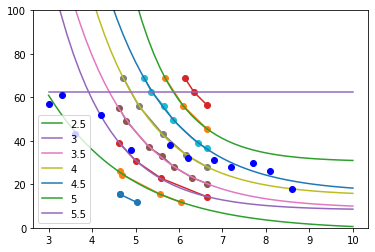

In [9]:
# param: List of point tuples
# return: Tuple of two lists, x- and y-coordinates
def get_xy(pts: list) -> tuple:
    return np.array([p[0] for p in pts]), np.array([p[1] for p in pts])


def calc_inv_exp(x_data, a=1, b=0, c=0):
    return a * np.exp(-b * x_data) + c


curve_vars = dict()

# Runtime overflow warnings
for lvl, pts in inflections.items():
    x_data, y_data = get_xy(pts)
    plt.plot(x_data, y_data, "o-")

    if lvl in (2, 2):
        continue  # Avoid generating breaking horizontal line fits

    popt, _ = curve_fit(calc_inv_exp, x_data, y_data)
    curve_vars[lvl] = popt

    x_data = np.linspace(3, 10)
    plt.ylim([0, 100])
    plt.plot(x_data, calc_inv_exp(x_data, *popt), "-", label=lvl)

x_data, y_data = get_xy(tuba_city)
plt.plot(x_data, y_data, "bo")
plt.legend()

In [5]:
"""
Outputs for Tuba City:

(3.3, 61, 3),
(4.2, 52, 3.5),
(5.8, 38, 4),
(7.2, 28, 4.5),
(8.1, 26, 5),
(8.6, 18, 4),
(7.7, 30, 5),
(6.8, 31, 4.5),
(6.2, 32, 4),
(4.9, 36, 3.5),
(3.6, 43, 2.5),
(3.0, 57, 2.5)

3
3.5
4
4.5
5
4
5
4.5
4
3.5
2.5
2.5
"""

'\nOutputs for Tuba City:\n\n(3.3, 61, 3),\n(4.2, 52, 3.5),\n(5.8, 38, 4),\n(7.2, 28, 4.5),\n(8.1, 26, 5),\n(8.6, 18, 4),\n(7.7, 30, 5),\n(6.8, 31, 4.5),\n(6.2, 32, 4),\n(4.9, 36, 3.5),\n(3.6, 43, 2.5),\n(3.0, 57, 2.5)\n\n3\n3.5\n4\n4.5\n5\n4\n5\n4.5\n4\n3.5\n2.5\n2.5\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


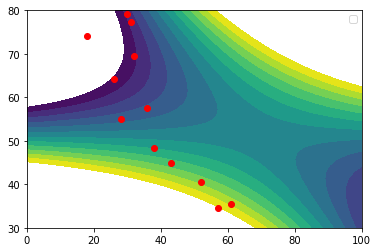

In [6]:
temps = np.array(
    [35.4, 40.6, 48.3, 55.0, 64.3, 74.0, 79.2, 77.3, 69.4, 57.5, 44.8, 34.6]
)


def output(h, t):
    return 45.93 - 0.36 * h - 1.20 * t + 0.007 * t**2 + 0.007 * h * t


humidity = np.array([h for i, h in tuba_city])
# H, T = np.meshgrid(humidity, temps)
H, T = np.meshgrid(np.linspace(0, 100), np.linspace(30, 100))
Z = output(H, T)
plt.contourf(H, T, Z, levels=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
plt.ylim([30, 80])

outputs = np.zeros_like(temps)
for i in range(len(temps)):
    outputs[i] = output(humidity[i], temps[i])

plt.plot(humidity, temps, "ro")
plt.legend()